# Bharat intern task 2

## Titanic survival prediction

In [1]:
# importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score

In [7]:
df=pd.read_csv(r"C:\Users\aswin\Downloads\archive (7)\Titanic-Dataset.csv")

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.shape

(891, 12)

In [10]:
# dataset contains 891 rows and 12 columns

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df["Age"].unique

<bound method Series.unique of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [16]:
df[df["Age"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


location of null values

In [17]:
df.loc[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

checking duplicates

In [19]:
df.duplicated().sum()

0

In [20]:
df["Age"].skew()

0.38910778230082704

skewness

In [22]:
df.kurt()

C:\Users\aswin\AppData\Local\Temp\ipykernel_26940\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

kurtosis

### null value percentage

In [23]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

dropping cabin

In [24]:
df=df.drop(["Cabin"],axis=1)

In [25]:
df.loc[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


index positions where age is a null value

In [26]:
np.where(df["Age"].isnull())

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

##### handling null values

In [27]:
df["Age"].replace(np.NaN,df["Age"].median(),inplace=True)

In [28]:
df["Embarked"].replace(np.NaN,df["Embarked"].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### null values are handled

In [30]:
col=list(df.columns)
cat=[]
num=[]
for i in col:
    if len(df[i].unique())>6:
        num.append(i)
    else:
        cat.append(i)
print("numerical :",num)
print("categorical :",cat)

numerical : ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
categorical : ['Survived', 'Pclass', 'Sex', 'Embarked']


In [31]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [32]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
df["Age"]=df["Age"].astype(int)

In [35]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [36]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### ploting countplot

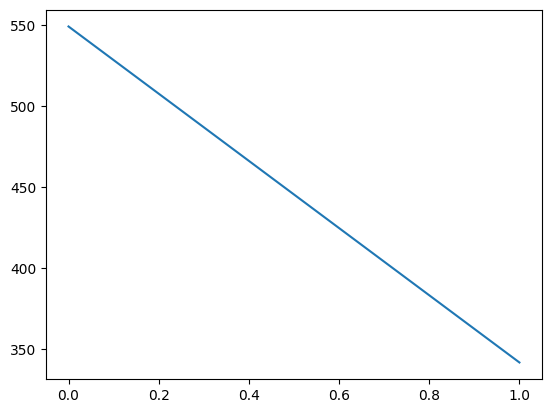

In [38]:
df["Survived"].value_counts().plot().bar
plt.show()

In [39]:
# outlier detection

Age


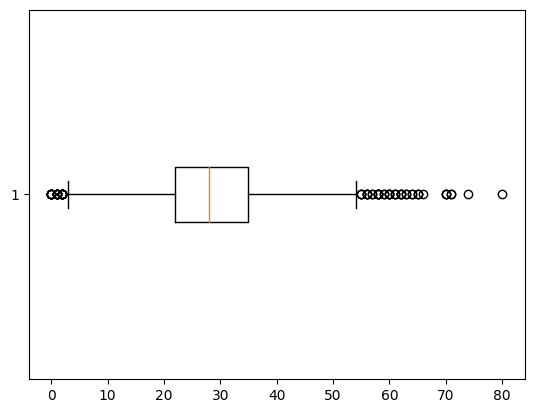

SibSp


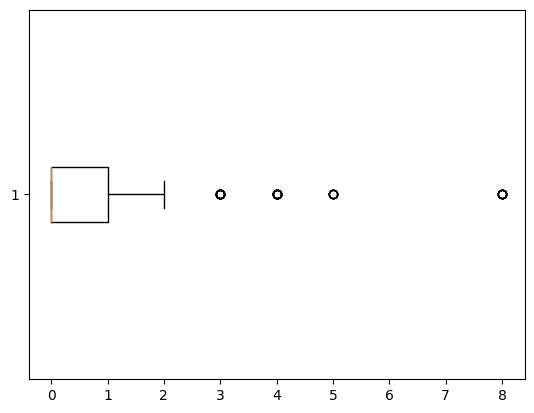

Parch


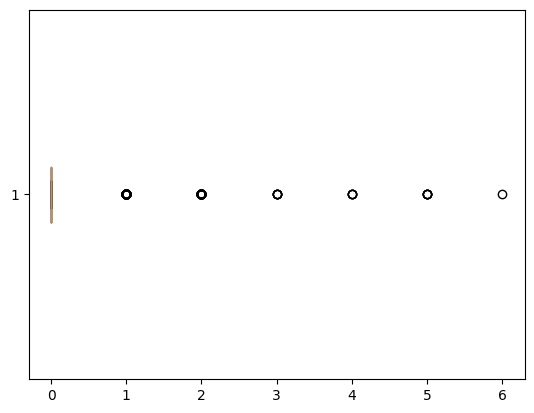

Fare


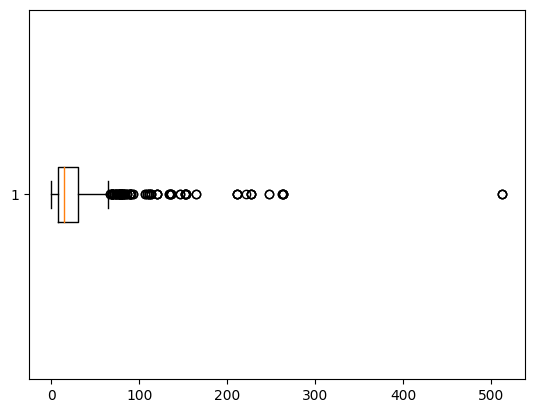

In [40]:
for i in ["Age","SibSp","Parch","Fare"]:
    plt.boxplot(df[i],vert=False)
    print(i)
    plt.show()

In [41]:
def outlier(df):
    for i in ["Age","Fare"]:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lo=q1-(1.5*iqr)
        up=q3+1.5*iqr
        df=df[(df[i]>lo) & (df[i]<up)]
    return df

In [42]:
df=outlier(df)

Age


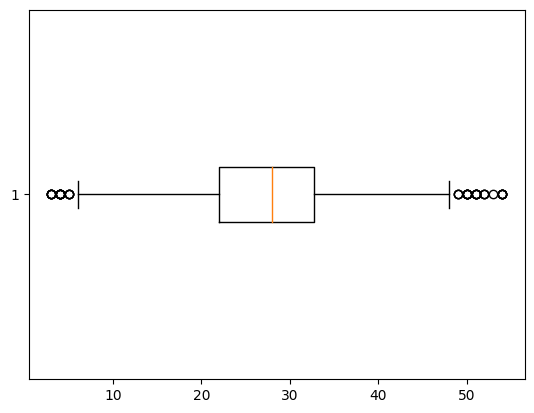

SibSp


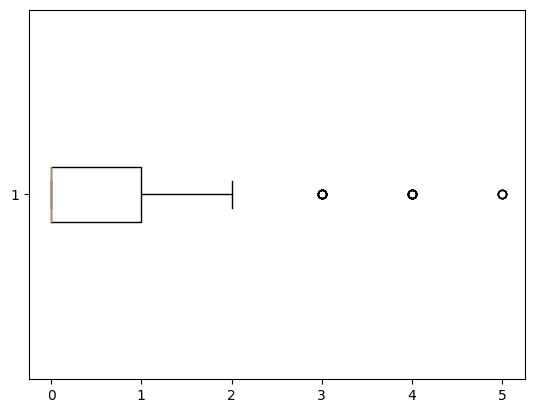

Parch


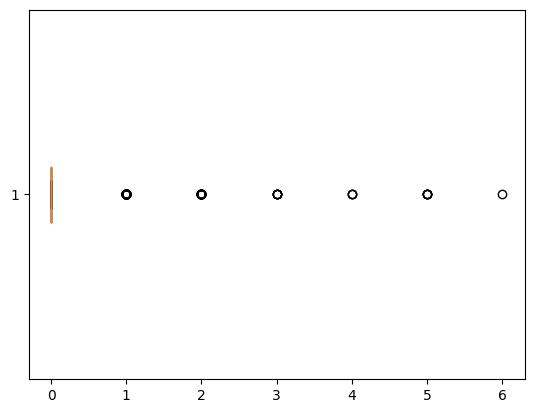

Fare


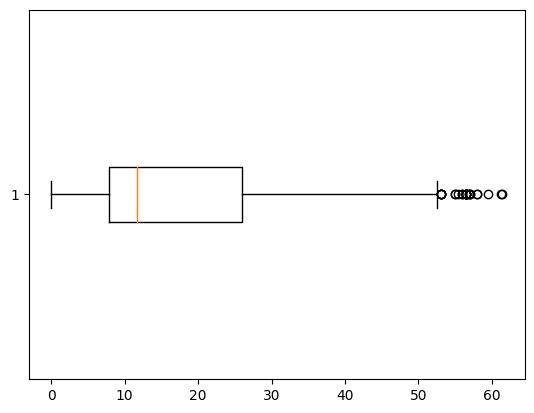

In [43]:
for i in ["Age","SibSp","Parch","Fare"]:
    plt.boxplot(df[i],vert=False)
    print(i)
    plt.show()

In [44]:
# EDA

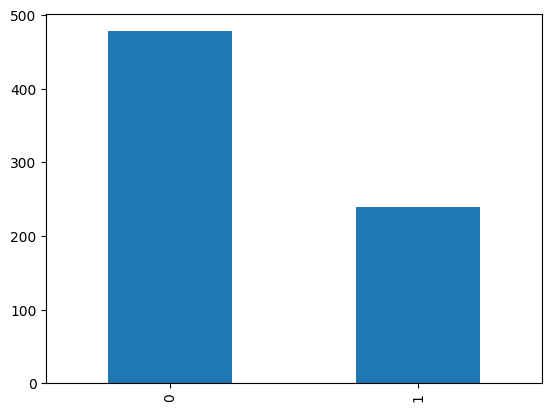

In [45]:
df["Survived"].value_counts().plot.bar()
plt.show()

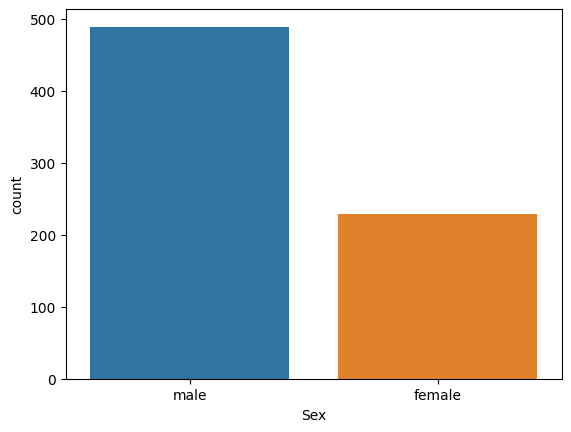

In [46]:
sns.countplot(x=df["Sex"])
plt.show()

In [47]:
# number of male passengers is greater than female

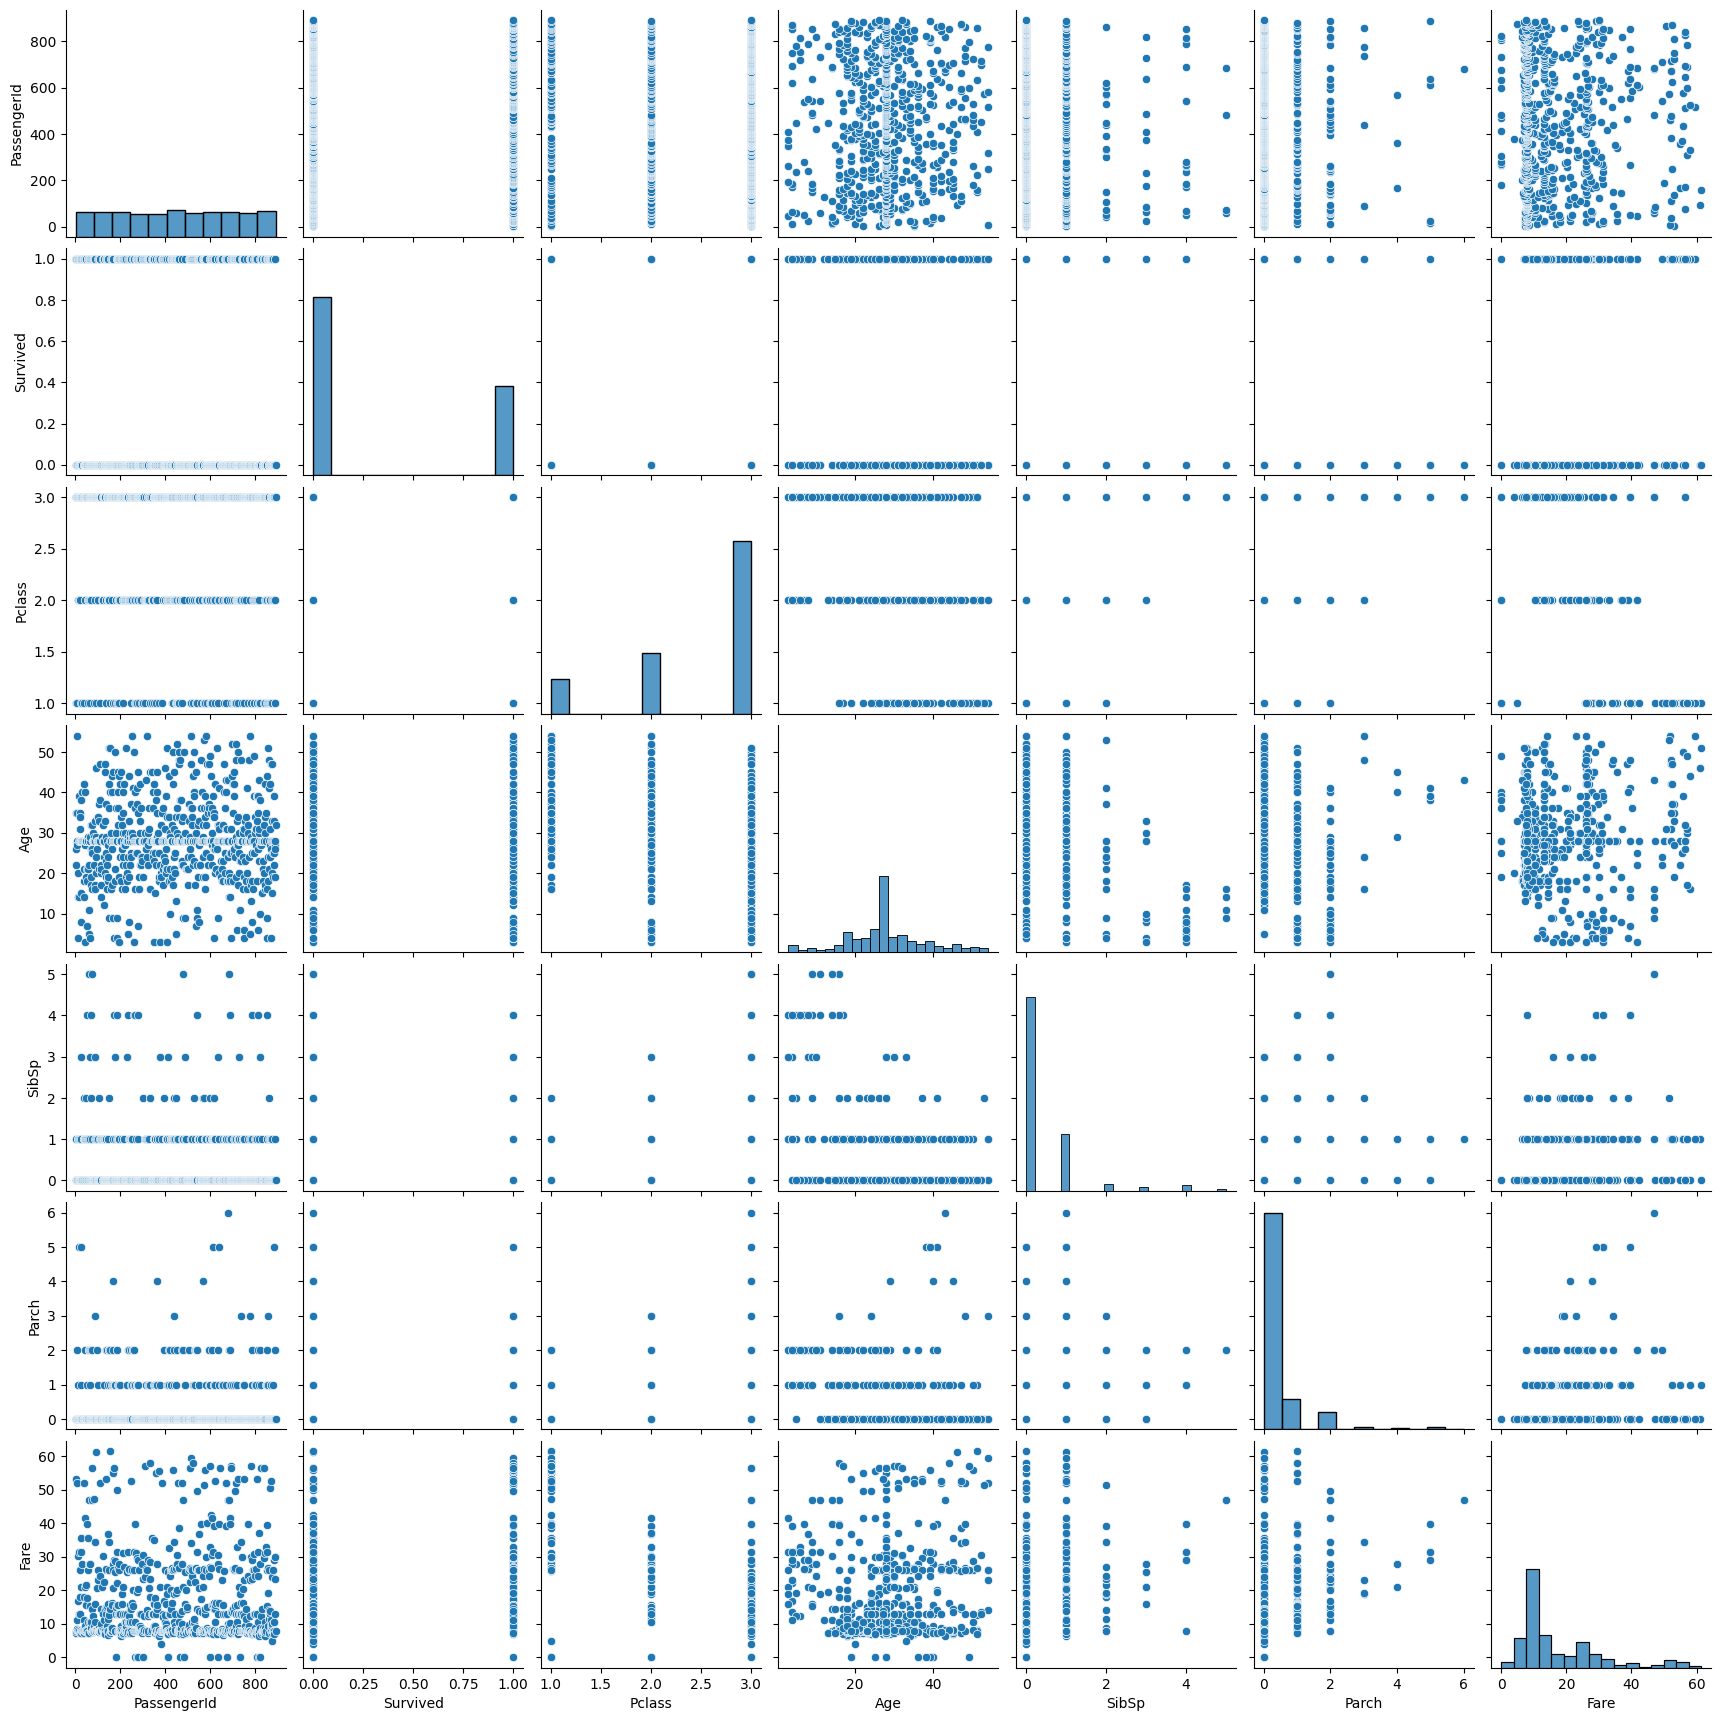

In [48]:
sns.pairplot(data=df)

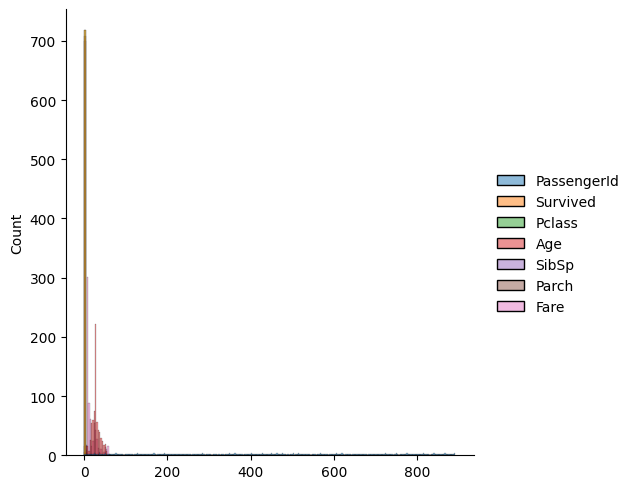

In [49]:
sns.displot(data=df)
plt.show()

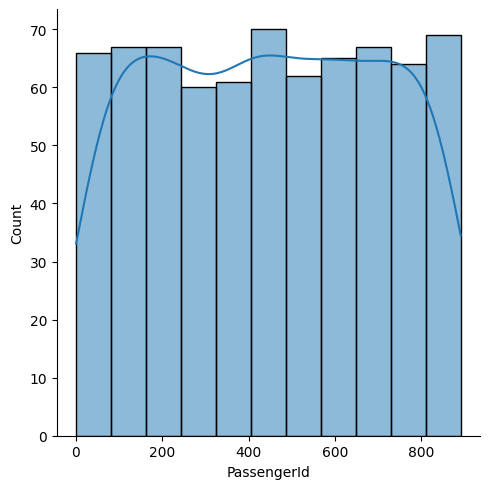

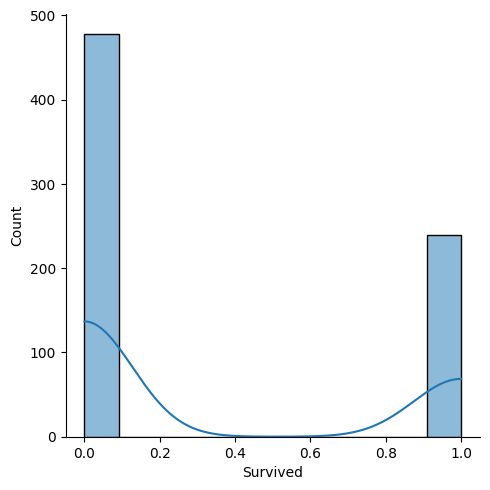

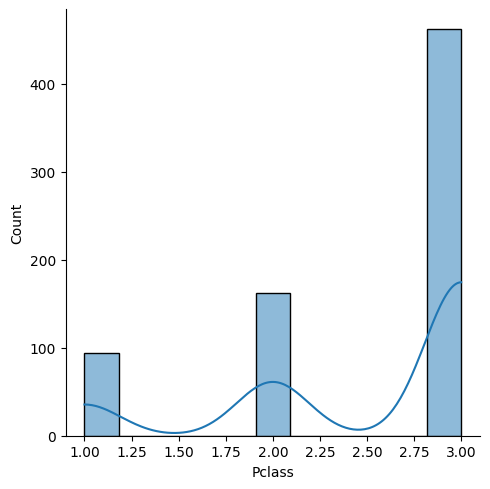

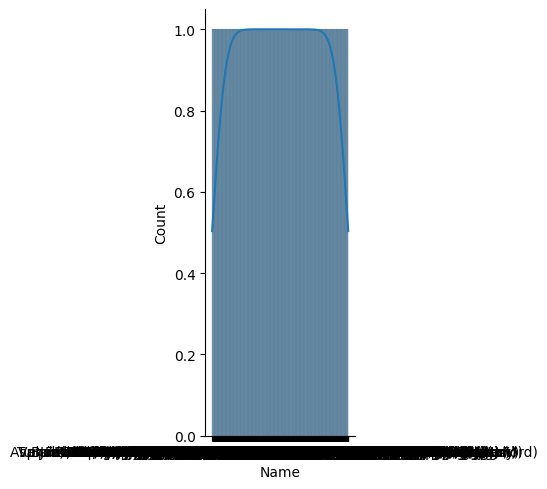

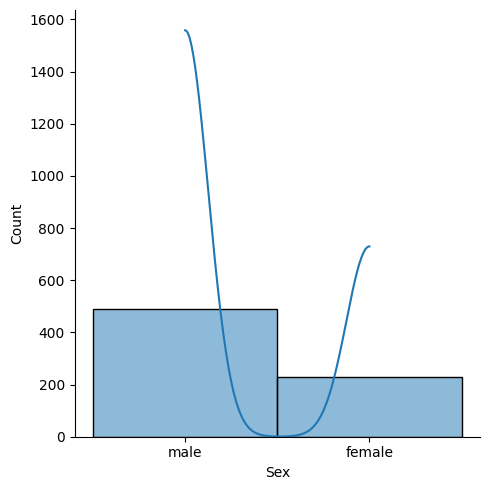

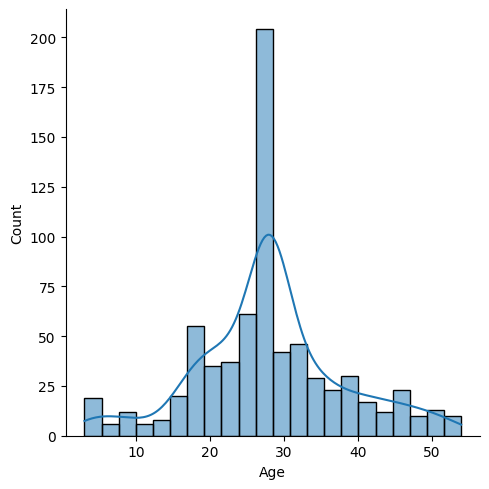

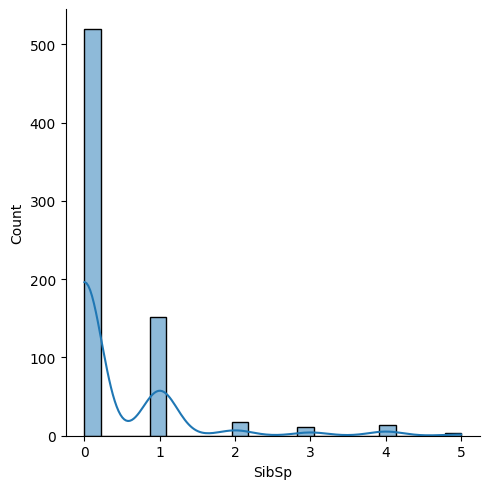

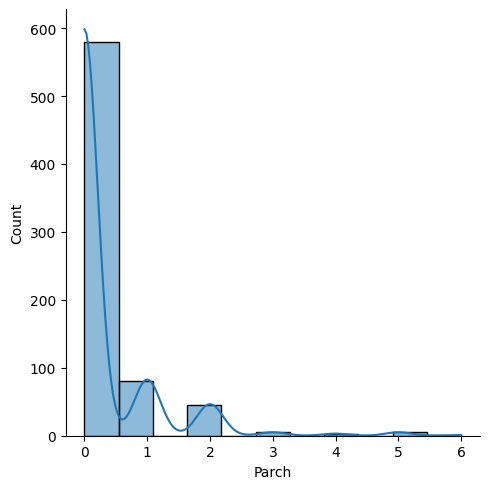

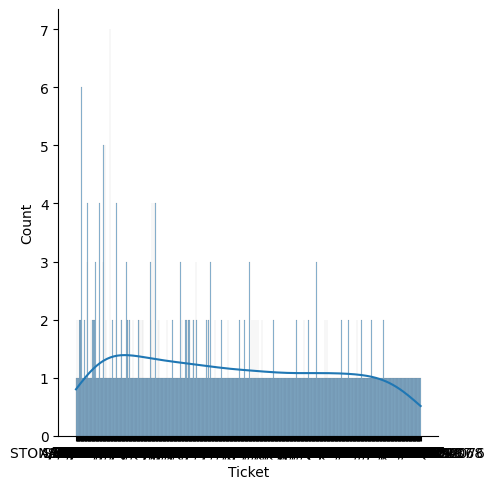

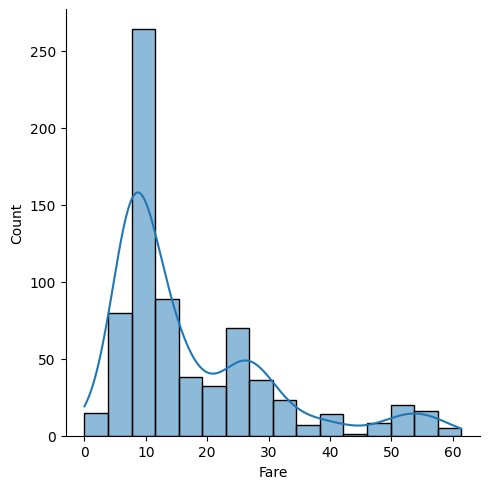

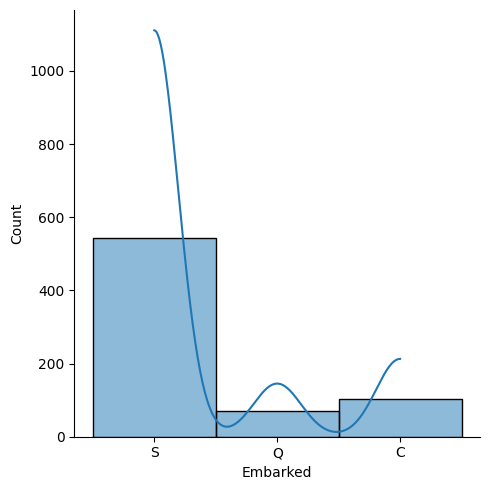

In [50]:
for i in df.columns:
    sns.displot(data=df[i],kde=True)
    plt.show()

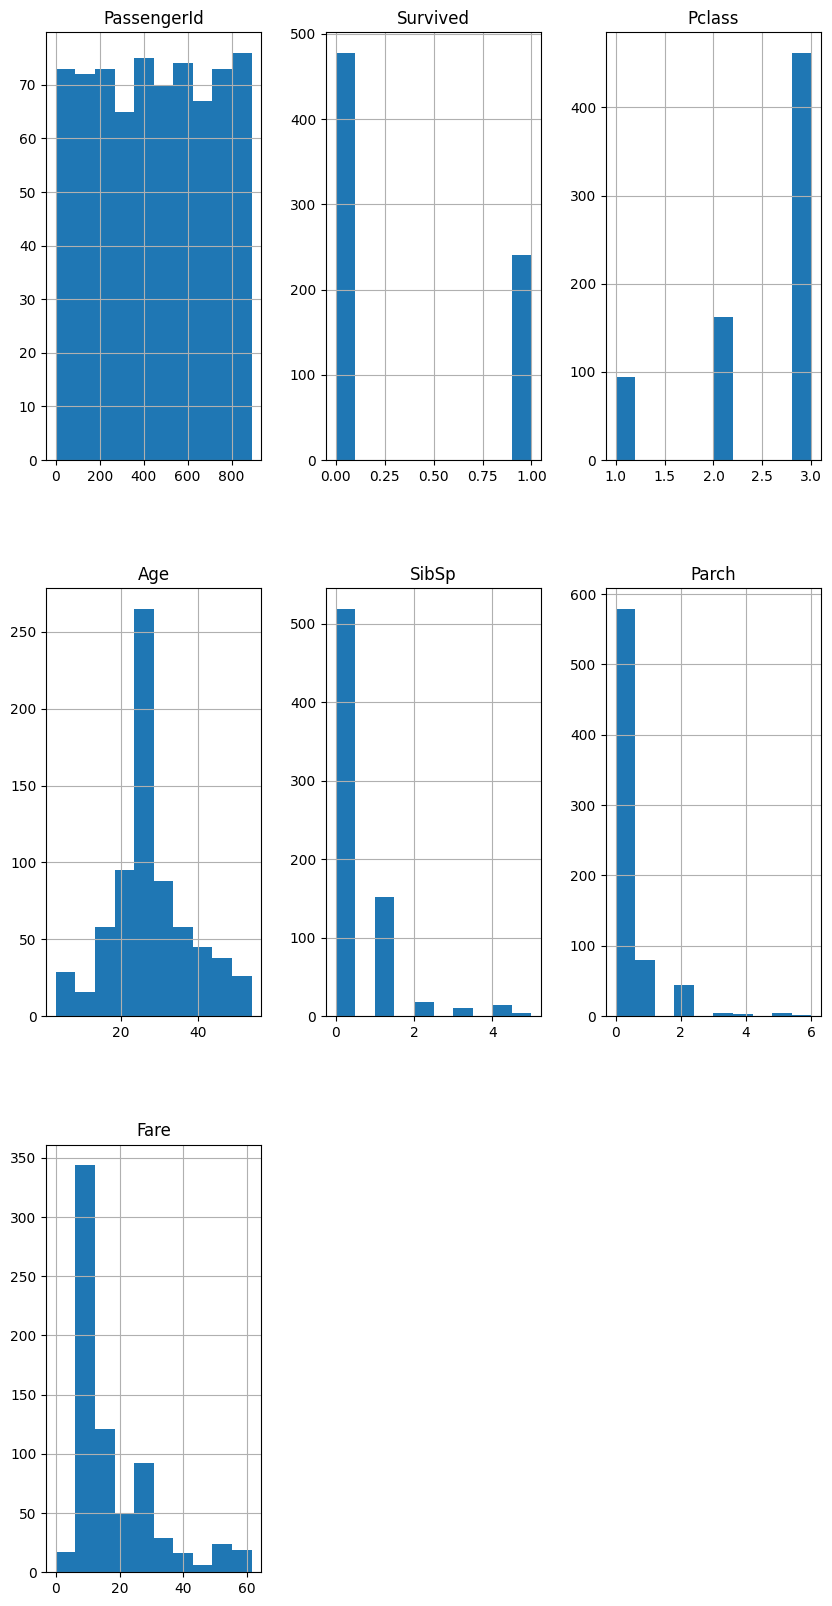

In [51]:
df.hist(figsize=(10,20))
plt.show()

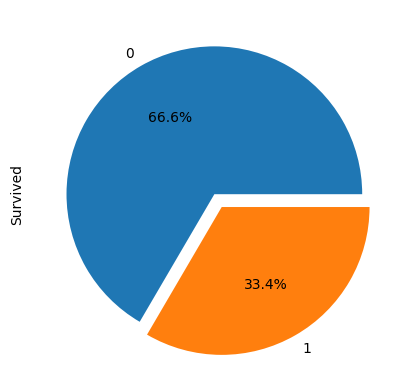

In [52]:
df["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()

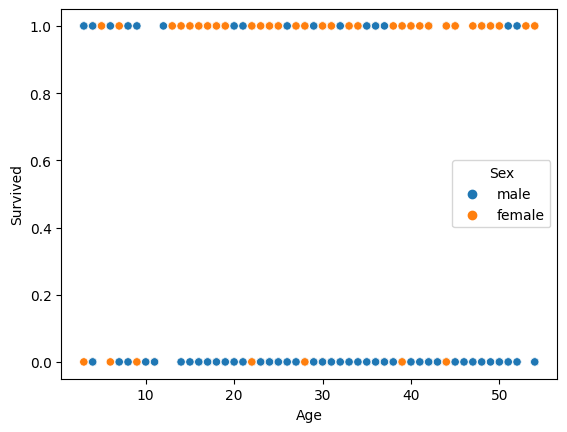

In [53]:
sns.scatterplot(data=df,x="Age",y="Survived",hue="Sex")
plt.show()

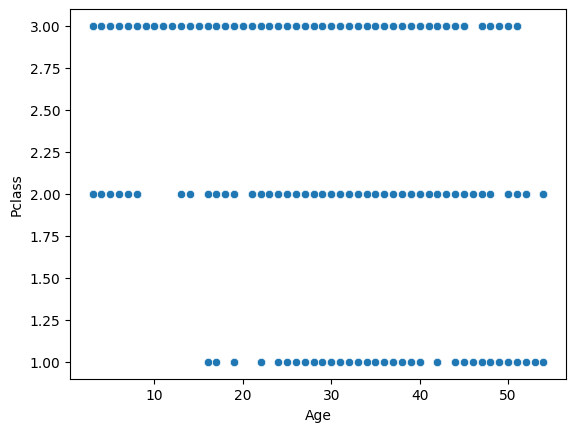

In [54]:
sns.scatterplot(data=df,x="Age",y='Pclass')
plt.show()

C:\Users\aswin\AppData\Local\Temp\ipykernel_26940\1076188632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


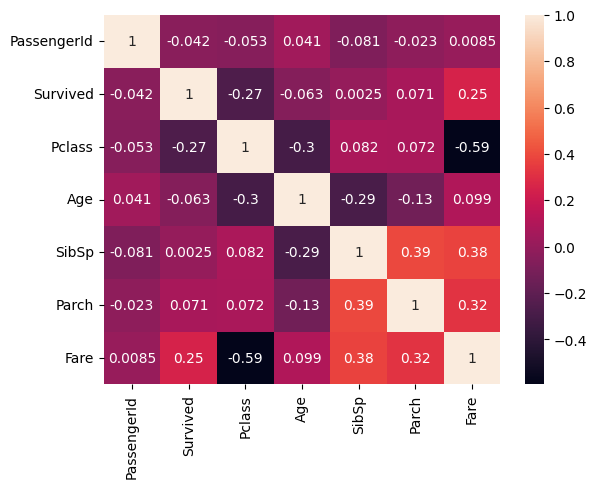

In [57]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

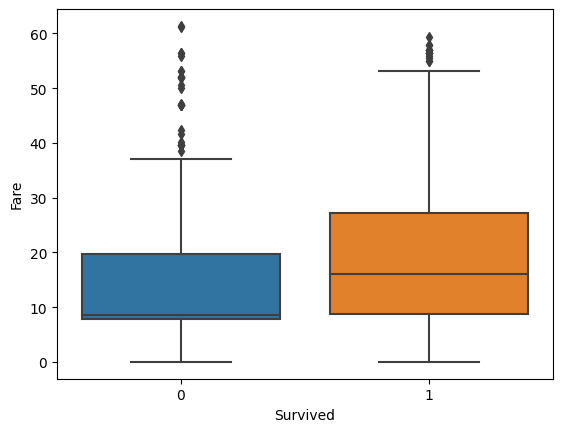

In [58]:
sns.boxplot(x='Survived', y='Fare', data=df)

<Axes: xlabel='Age', ylabel='Fare'>

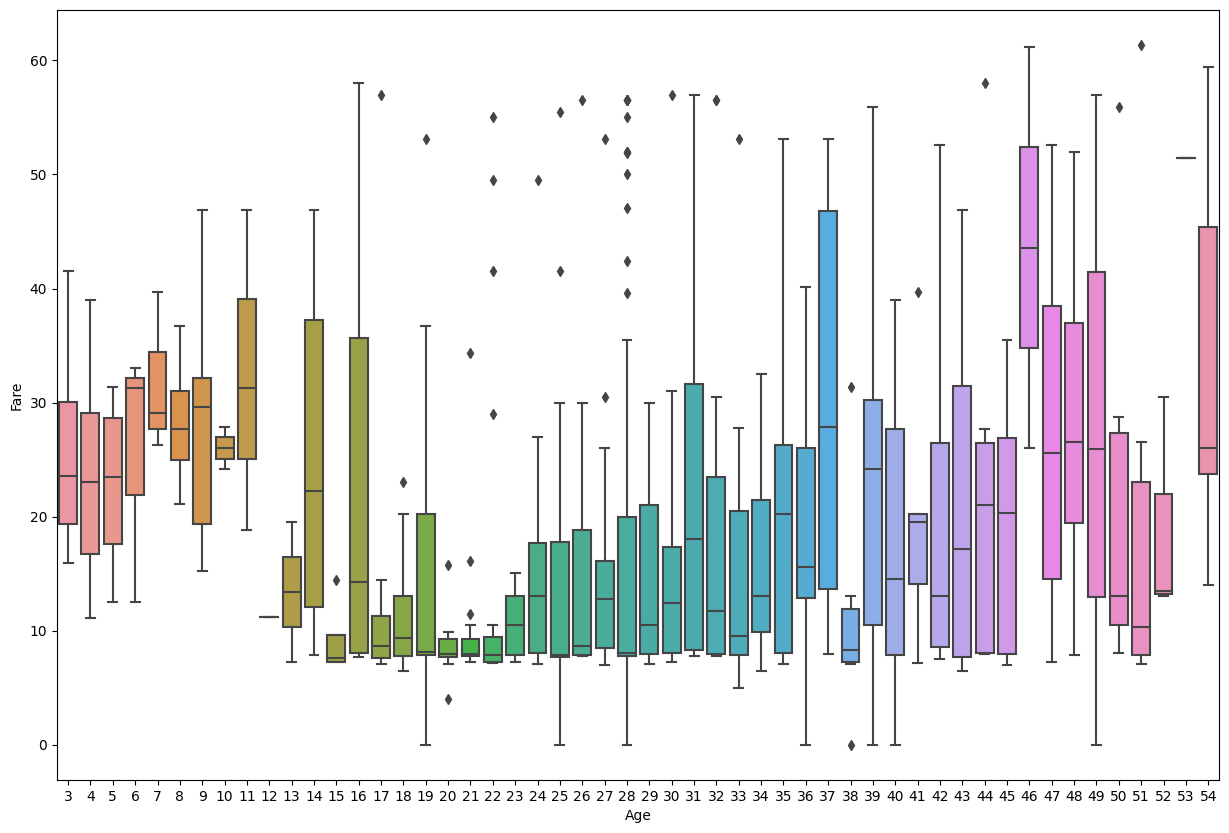

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Age', y='Fare', data=df)

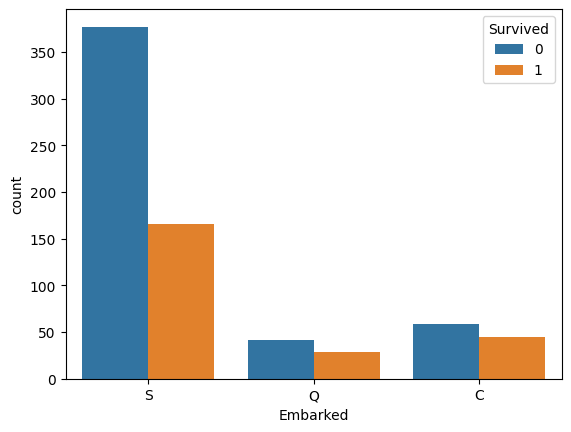

In [60]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

In [61]:
df['family_size'] = df['SibSp'] + df['Parch'] 

In [62]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [63]:
df1=df[["Pclass","Sex","Age","family_size","Embarked","Fare","Survived"]]

In [64]:
df1

,Pclass,Sex,Age,family_size,Embarked,Fare,Survived
0,3,male,22,1,S,7.2500,0
2,3,female,26,0,S,7.9250,1
3,1,female,35,1,S,53.1000,1
4,3,male,35,0,S,8.0500,0
5,3,male,28,0,Q,8.4583,0
...,...,...,...,...,...,...,...
886,2,male,27,0,S,13.0000,0
887,1,female,19,0,S,30.0000,1
888,3,female,28,3,S,23.4500,0
889,1,male,26,0,C,30.0000,1


In [65]:
df1.isnull().sum()

Pclass         0
Sex            0
Age            0
family_size    0
Embarked       0
Fare           0
Survived       0
dtype: int64

In [66]:
# label encoding

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
enc=OneHotEncoder(handle_unknown='ignore')

In [70]:
enc_df=pd.DataFrame(enc.fit_transform(df1[["Sex","Embarked"]]).toarray())

In [71]:
original_column_names = enc.get_feature_names_out(['Sex', 'Embarked'])

In [72]:
enc_df.columns = original_column_names

In [73]:
enc_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
713,0.0,1.0,0.0,0.0,1.0
714,1.0,0.0,0.0,0.0,1.0
715,1.0,0.0,0.0,0.0,1.0
716,0.0,1.0,1.0,0.0,0.0


In [74]:
df1=df1.join(enc_df)

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,28,330877,8.4583,Q,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,0


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
ln=LabelEncoder()

In [79]:
C=["Sex","Embarked"]
for i in C:
    df[i]=ln.fit_transform(df[i])

In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22,A/5 21171,7.2500,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35,373450,8.0500,2,0
5,6,0,3,"Moran, Mr. James",1,28,330877,8.4583,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,211536,13.0000,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,112053,30.0000,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,W./C. 6607,23.4500,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26,111369,30.0000,0,0


C:\Users\aswin\AppData\Local\Temp\ipykernel_26940\3741616228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['Survived']).sort_values(ascending = False).to_frame()


<Axes: >

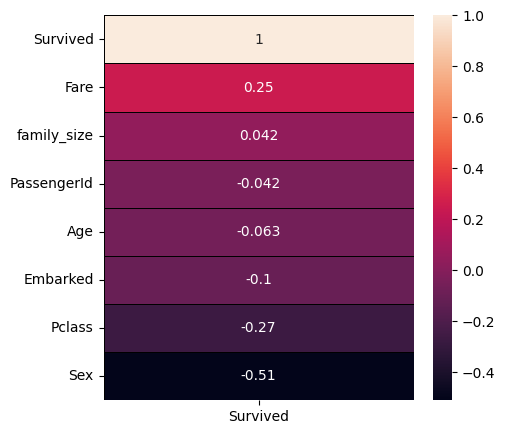

In [82]:
corr = df.corrwith(df['Survived']).sort_values(ascending = False).to_frame()
corr.columns = ['Survived']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black')

In [83]:
df=df[["Survived","Pclass","Sex","Age","Fare","Embarked","family_size"]]

In [84]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,1,22,7.2500,2,1
2,1,3,0,26,7.9250,2,0
3,1,1,0,35,53.1000,2,1
4,0,3,1,35,8.0500,2,0
5,0,3,1,28,8.4583,1,0
...,...,...,...,...,...,...,...
886,0,2,1,27,13.0000,2,0
887,1,1,0,19,30.0000,2,0
888,0,3,0,28,23.4500,2,3
889,1,1,1,26,30.0000,0,0


## model building

In [85]:
x=df.drop("Survived",axis=1)
x


,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,1,22,7.2500,2,1
2,3,0,26,7.9250,2,0
3,1,0,35,53.1000,2,1
4,3,1,35,8.0500,2,0
5,3,1,28,8.4583,1,0
...,...,...,...,...,...,...
886,2,1,27,13.0000,2,0
887,1,0,19,30.0000,2,0
888,3,0,28,23.4500,2,3
889,1,1,26,30.0000,0,0


In [86]:
y=df["Survived"]
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 718, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
y_train.value_counts()

0    383
1    191
Name: Survived, dtype: int64

### balancing y_train using SMOTE

In [92]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 495.5 kB/s eta 0:00:01
   ----------------------------- ---------- 174.1/235.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
sm=SMOTE()

In [99]:
x_train_smote,y_train_smote=sm.fit_resample(x_train,y_train)

In [100]:
y_train_smote.value_counts()

0    383
1    383
Name: Survived, dtype: int64

In [101]:
# class imbalance is handled

### knn classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [105]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6944444444444444

### 69% accuracy

In [107]:
print(classification_report(y_test,y_pred))
print("-----------------")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        95
           1       0.55      0.61      0.58        49

    accuracy                           0.69       144
   macro avg       0.67      0.67      0.67       144
weighted avg       0.70      0.69      0.70       144

-----------------
[[70 25]
 [19 30]]


<Axes: >

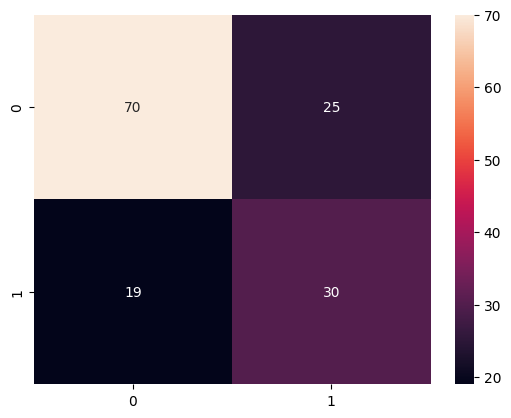

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [112]:
predictionsD = dtree.predict(x_test)

In [113]:
accurac= accuracy_score(y_test,predictionsD )
accurac

0.75

In [114]:
print(classification_report(y_test, predictionsD))
print("-----------------")
print(confusion_matrix(y_test, predictionsD))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        95
           1       0.62      0.67      0.65        49

    accuracy                           0.75       144
   macro avg       0.72      0.73      0.73       144
weighted avg       0.76      0.75      0.75       144

-----------------
[[75 20]
 [16 33]]


### decision tree classifier has an accuracy of 75%

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
model = GaussianNB()

In [117]:
model.fit(x_train_smote,y_train_smote)

GaussianNB()

In [118]:
y_pr = model.predict(x_test)

In [119]:
accura= accuracy_score(y_test,y_pr)
accura

0.7916666666666666

In [120]:
print(classification_report(y_test, y_pr))
print("-----------------")
print(confusion_matrix(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        95
           1       0.66      0.80      0.72        49

    accuracy                           0.79       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.81      0.79      0.80       144

-----------------
[[75 20]
 [10 39]]


### naive bayes has 79% accuracy

In [121]:
from sklearn.svm import SVC

In [122]:
model = SVC(kernel='linear', C=1.0)

In [123]:
model.fit(x_train_smote,y_train_smote)

SVC(kernel='linear')

In [124]:
y_svc = model.predict(x_test)

In [125]:
ac= accuracy_score(y_test,y_svc)
ac

0.7777777777777778

In [126]:
print(classification_report(y_test, y_svc))
print("-----------------")
print(confusion_matrix(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        95
           1       0.67      0.67      0.67        49

    accuracy                           0.78       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.78      0.78      0.78       144

-----------------
[[79 16]
 [16 33]]
